In [6]:
import numpy as np
from scipy.optimize import minimize
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

%matplotlib inline

def plt_contour(fun, delta=0.025, xlim=[-3.0, 3.0], ylim=[-3.0, 3.0], nlvl=11, klvl=0.05, res=None):
    x = np.arange(xlim[0], xlim[1], delta)
    y = np.arange(ylim[0], ylim[1], delta)
    X, Y = np.meshgrid(x, y)

    Z = np.array(np.zeros((len(y),len(x))))
    for i in xrange(len(x)):
        for j in xrange(len(y)):
            Z[j,i] = fun([x[i], y[j]])

    mn = np.amin(Z)
    mx = np.amax(Z)
    levels = np.linspace(0.0, klvl*(mx-mn), nlvl) + mn
    
    f = plt.figure(figsize=(10,10))
    CS = plt.contourf(Z, levels,
                     origin='lower',
                     extent=tuple(xlim+ylim))
    plt.colorbar()
    if res is not None:
        plt.plot(res.x[0], res.x[1], "y*", markersize=20)
    plt.axes().set_aspect('equal')
    
    return f

def plt_constraint(f, res=None, xlim=[-3.0, 3.0], ylim=[-3.0, 3.0]):
    # Inequality constraint
    theta_array = np.linspace(0, 2.0*np.pi, 100)
    r = 1.0

    x_list_ineq = r * np.cos(theta_array)
    y_list_ineq = r * np.sin(theta_array)
    x_list_eq = [-1, 2]
    y_list_eq = [2, -1]

    plt.figure(f.number)
    plt.plot(x_list_ineq, y_list_ineq, 'r-', linewidth=2)
    plt.plot(x_list_eq, y_list_eq, 'r--', linewidth=2)
    if res is not None:
        plt.plot(res.x[0], res.x[1], "g*", markersize=20)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.axes().set_aspect('equal')
    
    return f

$\textbf{Part 0:}$ function as an input

Central difference

Example: Central difference: $f'(x)\approx \frac{f(x+\Delta x)-f(x-\Delta x)}{2\Delta x}$ for $f_1(x)=x^3$ and $f_2(x)=x^2$ with $x=1.0, \Delta x = 10^{-8}$

(Why do we need this? We will pass the function to the optimizer!)

In [56]:
import numpy as np

def CD(f, x, dx):
    return (f(x + dx) - f(x - dx)) / (2 * dx)

def f1(x):
    
    return x**3

def f2(x):
    
    return x**2

if (1 == 0):
    x = 1.0
    dx = 1e-8
    print(CD(f2, x, dx))






$\textbf{Part I:}$ Unconstrained Optimization

Example: $\text{min}\, f(x)$

where $f$ is the Rosenbrock function: $f=\left(100(x_2-x_1^2)\right)^2+\left(1-x_1\right)^2$.

What does the function look like?

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 24
         Gradient evaluations: 24
('res_ros.x', array([ 0.99999913,  0.99999825]))


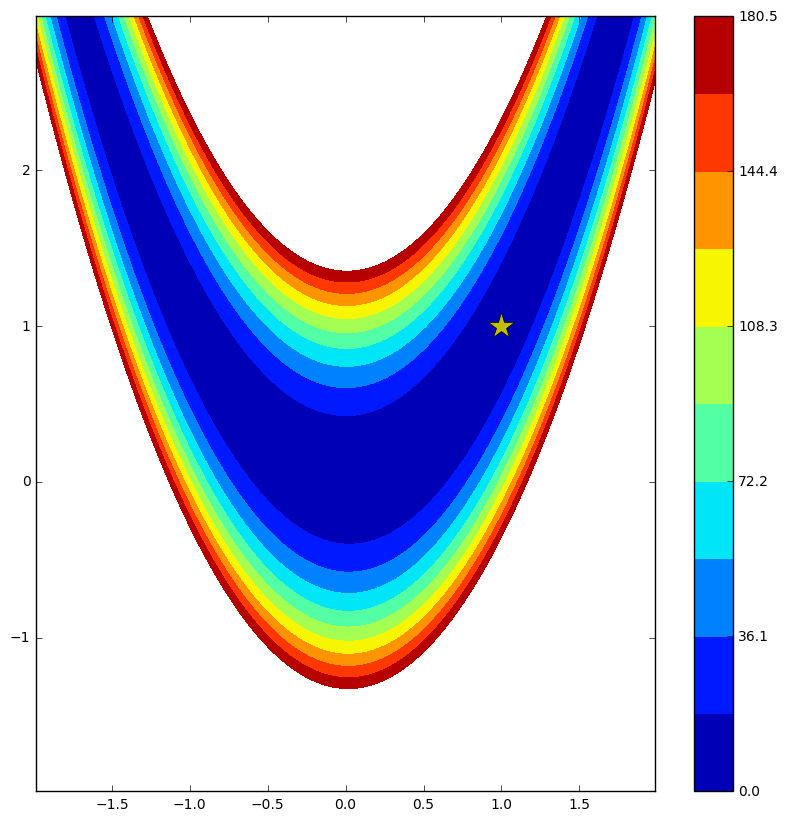

In [8]:
# Rosenbrock function
def rosen(x):
    """The Rosenbrock function"""
    return (100.0*(x[1]-x[0]**2.0)**2.0 + (1-x[0])**2.0)

# Rosenbrock gradient
def rosen_der(x):

    der = np.zeros(2)

    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[1] = 200*(x[1]-x[0]**2)
    return der

# initial pt for optimization
x0 = np.array([0.0,0.0])

# optimize!
res_ros = minimize(rosen, x0, method='BFGS', jac=rosen_der,options={'disp': True})
print("res_ros.x", res_ros.x)




#########################################################

# Visualization
f = plt_contour(rosen, res=res_ros, xlim=[-2.0, 2.0], ylim=[-2.0, 3.0])
plt.show()

$\textbf{Part I:}$ cont'd: 

Let us play around with different optimization algorithms and options!

‘Nelder-Mead’ (gradient free)

‘Powell’ (gradient free)

‘CG’ (conjugate gradient - advanced gradient descent type method)

‘BFGS’ (quasi Newton type)

‘Newton-CG’(Newton conjugate gradient)

‘L-BFGS-B’ (quasi Newton type)

‘TNC’ (truncated Newton method)

‘COBYLA’ (gradient free)

‘SLSQP’ (Newton type)

‘dogleg’ (trust region method)

‘trust-ncg’ (Newton conjugate gradient with trust region)

https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.minimize.html


In [50]:
# Comparing several different optimization algorithms

wjac_list = ['BFGS', 'CG', 'SLSQP']
njac_list = ['Powell', 'COBYLA', 'Nelder-Mead']
method_list = wjac_list + njac_list
jac_list = [rosen_der, None]

nfev = []
for method in wjac_list:
    tmp = []
    for jac in jac_list:
        res = minimize(rosen, x0, method=method, jac=jac, options={'disp': False})
        if hasattr(res, 'njev'):
            tmp.append([res.nfev, res.njev])
        else:
            tmp.append([res.nfev, -1])
    nfev.append(tmp)
for method in njac_list:
    tmp = []
    for jac in jac_list:
        if jac is None:
            res = minimize(rosen, x0, method=method, options={'disp': False})
            tmp.append([res.nfev, -1])
        else:
            tmp.append([-1, -1])
    nfev.append(tmp)
nf = np.array(nfev)

nmet  = len(method_list)
tabs0 = '\t\t'.join(['{'+str(i)+'}' for i in range(nmet)])
tabs1 = '\t'.join(['Fun\tJac']*nmet)
tabs2 = '\t'.join(['{'+str(i)+'}' for i in range(2*nmet)])

print '       '+tabs0.format(*method_list)
print "       "+tabs1
print 'w/ J:  '+tabs2.format(*nf[:,0,:].flatten())
print 'wo/ J: '+tabs2.format(*nf[:,1,:].flatten())






       BFGS		CG		SLSQP		Powell		COBYLA		Nelder-Mead
       Fun	Jac	Fun	Jac	Fun	Jac	Fun	Jac	Fun	Jac	Fun	Jac
w/ J:  24	24	42	42	32	23	-1	-1	-1	-1	-1	-1
wo/ J: 96	24	220	55	101	23	453	-1	1000	-1	146	-1


$\textbf{Conclusion:}$

Gradient based > gradient free

Provide gradient > no gradient provided

Newton type > CG, SD

$\textbf{Programming time:}$

Minimize McCormick function, with starting point at $(0, 0)$. Play with the options and find the best one with least func and gradient evaluations.

(McCormick function: $f(x, y)=\text{sin}(x + y) + (x - y)^2 - 1.5x + 2.5y + 1$)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1.91322294931
            Iterations: 6
            Function evaluations: 8
            Gradient evaluations: 6
[ 0.99999467  0.99998932]


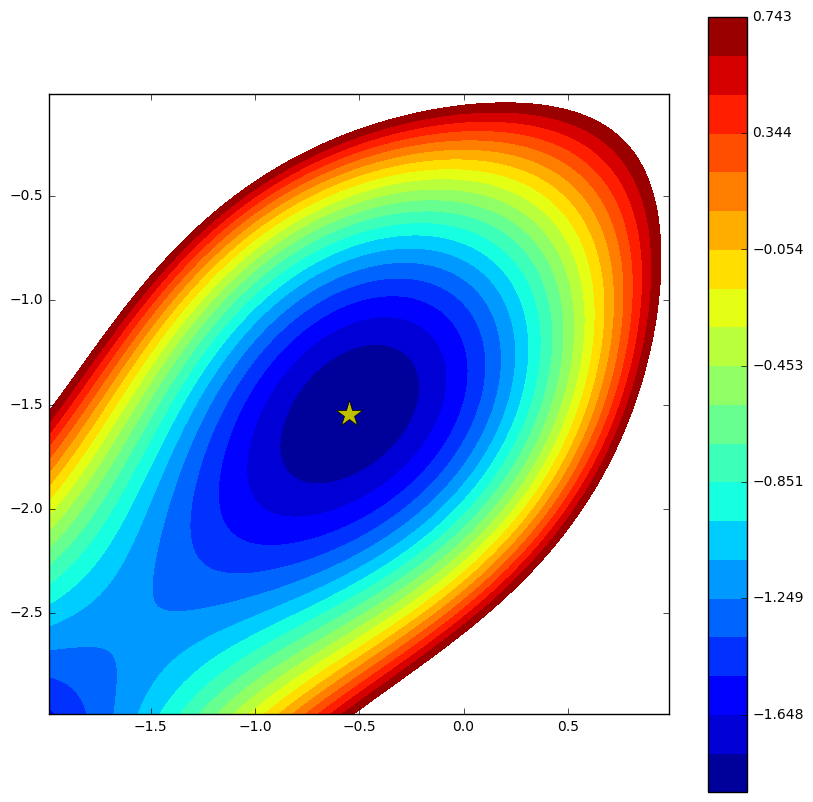

In [12]:
def mccormick(x_vec):
    
    x = x_vec[0]
    y = x_vec[1]
    
    return np.sin(x + y) + (x - y)**2 - 1.5 * x + 2.5 * y + 1.0

def mccormickJac(x_vec):
    
    x = x_vec[0]
    y = x_vec[1]
    
    der = np.zeros(2)
    
    der[0] = np.cos(x + y) + 2 * (x - y) - 1.5
    der[1] = np.cos(x + y) - 2 * (x - y) + 2.5
    
    return der

def mccormickHess(x_vec):
    
    x = x_vec[0]
    y = x_vec[1]
    
    Hessian = np.zeros((2,2))
    
    Hessian[0, 0] = np.sin(x + y) + 2
    Hessian[1, 0] = np.sin(x + y) - 2
    Hessian[0, 1] = Hessian[1, 0]
    Hessian[1, 1] = np.sin(x + y) + 2
    
    return Hessian
    
    

x0 = np.array([0.0,0.0])

res_mcc = minimize(mccormick, x0, method='SLSQP',jac=mccormickJac,    options={'disp': True})
print(res.x)





#########################################################

# post process
f = plt_contour(mccormick, res=res_mcc, xlim=[-2.0, 1.0], ylim=[-3.0, 0.0], nlvl=21, klvl=0.3)
plt.show()

$\textbf{Part II:}$ constrained optimization

Return to Rosenbrock function. But this time, we will add $\textbf{constraints}$! 

\begin{equation*}
\begin{aligned}
\text{min}  &&f(x)\\
\text{s.t.} &&g(x)\leq 0\\
&&c(x) = 0
\end{aligned}
\end{equation*}

In our case, $f(x)$ is Rosenbrock function. $g(x)=x^2+y^2-1$, $c(x)=x+y-1$.

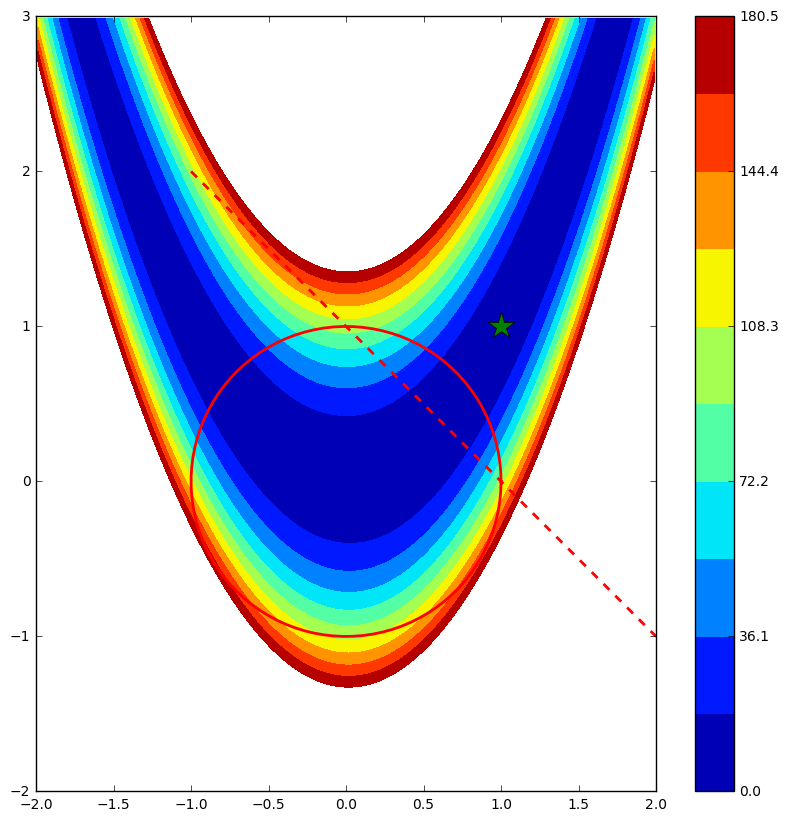

In [51]:

f = plt_contour(rosen, res=res_ros, xlim=[-2.0, 2.0], ylim=[-2.0, 3.0])
f = plt_constraint(f, res_ros, xlim=[-2.0, 2.0], ylim=[-2.0, 3.0])
plt.show()

In [52]:
# Rosenbrock function
def rosen(x):
    """The Rosenbrock function"""
    return (100.0*(x[1]-x[0]**2.0)**2.0 + (1-x[0])**2.0)

# Rosenbrock gradient
def rosen_der(x):

    der = np.zeros(2)

    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[1] = 200*(x[1]-x[0]**2)
    return der

How to add constraints to "minimize"?

Constraints will appear as a list of constraint. Every constraint is written as a dictionary, i.e. {'type': ..., 'fun': ..., 'jac':...}

You should tell the optimizer it is equality (eq) or inequality (ineq) for type. The function expression after "fun" and its jacobian after "jac". 

Notice if you are constructing an inequality say $2x<=1$, then you must write it in the form of $1-2x>=0$ and assign $1-2x$ for "fun". It is a convention for scipy.minimize.

In [ ]:
# constraints
    
cons = [{'type': 'ineq',
          'fun' : lambda x: np.array([1-x[0]**2-x[1]**2]),
          'jac' : lambda x: np.array([-x[0]*2.0, -x[1]*2.0])}, 
        {'type': 'eq',
          'fun' : lambda x: np.array([x[0] + x[1]-1.0]),
          'jac' : lambda x: np.array([1.0,1.0])}
         ]

# initial point
x0 = np.array([0.0,0.0])


# optimize!
res_cnst = minimize(rosen, x0, jac=rosen_der,constraints=cons, method='SLSQP', options={'disp': True})


f = plt_contour(rosen, res=res_ros, xlim=[-2.0, 2.0], ylim=[-2.0, 3.0])
f = plt_constraint(f, res=res_cnst, xlim=[-2.0, 2.0], ylim=[-2.0, 3.0])
plt.show()

$\textbf{Programming time:}$ Minimize rosenbrock function with the following constraint: $||x||_\infty\leq 0.8$ where $||\cdot||_\infty$ returns the maximum absolute value from an array. 

In [54]:
cons2 = [{'type': 'ineq',
          'fun' : lambda x: np.array([0.8 - x[0]]),
          'jac' : lambda x: np.array([-1.0, 0])}, 
        {'type': 'ineq',
          'fun' : lambda x: np.array([0.8 + x[0]]),
          'jac' : lambda x: np.array([1.0, 0])}, 
        {'type': 'ineq',
          'fun' : lambda x: np.array([0.8 - x[1]]),
          'jac' : lambda x: np.array([0, -1.0])}, 
        {'type': 'ineq',
          'fun' : lambda x: np.array([0.8 + x[1]]),
          'jac' : lambda x: np.array([0, 1.0])}, 
         ]

res = minimize(rosen, x0, jac=rosen_der,constraints=cons2, method='SLSQP', options={'disp': True})
print "infinite norm result", res.x



Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0400000030739
            Iterations: 15
            Function evaluations: 22
            Gradient evaluations: 15
infinite norm result [ 0.8         0.64000554]


$\textbf{Part III:}$ KS aggregation
Example: We will demonstrate how KS aggregation approximate the maximum of 4 functions in the domain of $x\in [-1.5, 1.5]$.

$f_1 = sin(x), f_2=cos(x), f_3=x, f_4=x^2$


In [ ]:
"""Example:"""

def ks_f1(x):

    return np.sin(x)

def ks_f2(x):
    
    return np.cos(x)

def ks_f3(x):
    
    return x

def ks_f4(x):
    
    return x**2

# true max
N = 100
x_list = np.linspace(-1.5, 1.5, N)

f1_list = ks_f1(x_list)
f2_list = ks_f2(x_list)
f3_list = ks_f3(x_list)
f4_list = ks_f4(x_list)

f_max_true_list = []
for i in xrange(N):
    
    f_x_list = [f1_list[i], f2_list[i], f3_list[i], f4_list[i]]
    f_max_true_list.append(max(f_x_list))
    
    
# KS max

rho = 10.0

f_max_KS_list = []

for i in xrange(N):
    
    f_x_list = [f1_list[i], f2_list[i], f3_list[i], f4_list[i]]
        
    jmax = np.argmax(f_x_list)
    
    sum_exp_max = np.sum(np.exp(rho * (f_x_list - f_x_list[jmax])))
        
    sum_exp_max_log = np.log(sum_exp_max)
    
    KS_loc = f_x_list[jmax] + 1.0 / rho * sum_exp_max_log
    
    f_max_KS_list.append(KS_loc)


    
plt.plot(x_KS_list, f_max_true_list, label = 'true maximum')    
plt.plot(x_KS_list, f_max_KS_list, '--', label = 'KS')  

plt.legend()
plt.show()

$\textbf{Programming time:}$ Truss weight optimziation

Problem description: We want to design the best of cross section area for a truss structure which minimize the material useage but if safe to use without structural failure.

Problem sketch: ![title](truss.png)



Problem formulation:
\begin{equation*}
\begin{aligned}
\text{min}  &&W(\textbf{A})\\
\text{s.t.} && \sigma_{\text{min}} \leq S(\textbf{A})\leq \sigma_{\text{max}}\\
&&\textbf{A} \geq  0.01
\end{aligned}
\end{equation*}

where $\textbf{A}$ is an array with the crossection area for the trusses, e.g $A_i$ area for ith truss. $W$ is the weight up to a scale, more explicitly it takes the form of $W=\sum_i l_i A_i $. $S(A)$ is a function to get the stress of each truss and it returns an array with same dimension as the area array. And it should be bounded in some stress bounds in case of structure failure. Finally all truss should have an area larger than $0.01$ to conunter any topological change which will cause our stiffness matrix ill conditioned.

Apparently as the number of truss grow larger, the stress var number will grow larger. This will increase the size of problem we are solving. So why not aggregate these constraints and solve it more efficiently!



Iteration limit exceeded    (Exit mode 9)
            Current function value: 4.51341617272
            Iterations: 101
            Function evaluations: 1813
            Gradient evaluations: 101


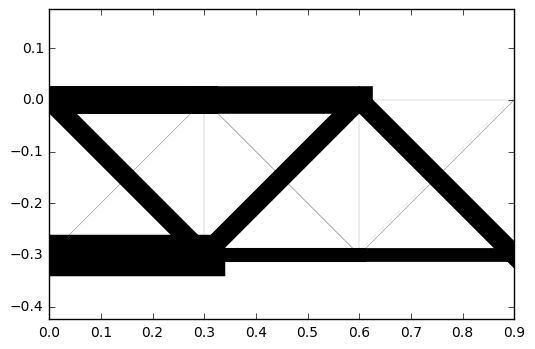

areas [ 2.01334675  1.39592271  0.01846748  2.98716095  0.01        1.9872385
  0.02252627  1.39598693  1.01319813  0.01        0.01        1.40121799
  0.01765501  0.99085639  0.01      ] stress [-9.99848948 -9.99889524  9.98786427  9.99931848 -0.02289094 -9.9987005
 -8.17387588  9.99866711  9.99823937  3.67293454 -9.34680835 -9.99840985
  7.48704339  9.99794925 -9.34680835]


In [102]:
"""Part III. KS aggregation: Truss optimization"""
def get_matrix(areas):
    
    global nodes
    global elements
    global cons
    global E
    
    num_nodes = nodes.shape[0]
    num_elems = elements.shape[0]
    num_cons = cons.shape[0]

    nnn = 2 * num_nodes
    nnz = nnn + 2 * num_cons
    
    K_glo = np.matrix(np.zeros((nnn, nnn)))
    K_glo_aug = np.matrix(np.zeros((nnz, nnz)))
    aug = np.matrix(np.zeros((2 * num_cons, nnn)))
    
    K_loc_aligned = np.matrix(np.zeros((2, 2)))
    K_loc_aligned[0, 0] =  1.0
    K_loc_aligned[1, 0] = -1.0
    K_loc_aligned[0, 1] = -1.0
    K_loc_aligned[1, 1] =  1.0 
    
    index_loc_row = np.matrix(np.zeros((4, 4),dtype=int))
    index_loc_col = np.matrix(np.zeros((4, 4),dtype=int))
    
    index_loc_row[1, :] += 1
    index_loc_row[3, :] += 1
    index_loc_col[:, 1] += 1
    index_loc_col[:, 3] += 1
    
    index_LU_ones = np.matrix(np.zeros((4, 4),dtype=int))
    index_LL_ones = np.matrix(np.zeros((4, 4),dtype=int))
    index_RU_ones = np.matrix(np.zeros((4, 4),dtype=int))
    index_RL_ones = np.matrix(np.zeros((4, 4),dtype=int))
    
    index_LU_ones[0:2,0:2] += 1
    index_LL_ones[2:4,0:2] += 1
    index_RU_ones[0:2,2:4] += 1
    index_RL_ones[2:4,2:4] += 1
        
    
    
    for i in xrange(num_elems):
        
        area_loc = areas[i]
        
        node_ind_1 = elements[i, 0]
        node_ind_2 = elements[i, 1]
        
        xy1 = np.transpose(nodes[node_ind_1, :])
        xy2 = np.transpose(nodes[node_ind_2, :])
        
        dx = xy2 - xy1
        l_loc = np.sqrt(np.sum(np.multiply(dx,dx)))
        
        cos_xy = dx / l_loc
        
        T = np.matrix(np.zeros((2, 4)))
        T[0, 0:2] = np.transpose(cos_xy)
        T[1, 2:4] = np.transpose(cos_xy)
        
        K_loc = (E * area_loc / l_loc) * np.transpose(T).dot(K_loc_aligned).dot(T)
        
        
        index_glo_row = np.matrix(np.zeros((4, 4),dtype=int))
        index_glo_row += index_loc_row
        index_glo_row += index_LU_ones * node_ind_1 * 2
        index_glo_row += index_RU_ones * node_ind_1 * 2
        index_glo_row += index_LL_ones * node_ind_2 * 2
        index_glo_row += index_RL_ones * node_ind_2 * 2

        index_glo_col = np.matrix(np.zeros((4, 4),dtype=int))
        index_glo_col += index_loc_col
        index_glo_col += index_LU_ones * node_ind_1 * 2
        index_glo_col += index_RU_ones * node_ind_2 * 2
        index_glo_col += index_LL_ones * node_ind_1 * 2
        index_glo_col += index_RL_ones * node_ind_2 * 2
        
        
        for ii in xrange(4):
            for jj in xrange(4):
                
                ind_row = index_glo_row[ii, jj]
                ind_col = index_glo_col[ii, jj]
                
                K_glo[ind_row, ind_col] += K_loc[ii, jj]
                
    "constraints"
    for i in xrange(num_cons):
        
        ind_con = cons[i]
        
        aug[2*i,   2*ind_con] = 1.0
        aug[2*i+1, 2*ind_con+1] = 1.0
        
    
    K_glo_aug[0:nnn, 0:nnn] += K_glo
    K_glo_aug[nnn:,  0:nnn] += aug
    K_glo_aug[0:nnn,  nnn:] += np.transpose(aug)
    
    
    return K_glo_aug
    

    
def get_stress(areas):
    
    global nodes
    global elements
    global cons
    global E
    
    global length_list
    
    global rhs
    
    num_nodes = nodes.shape[0]
    num_elems = elements.shape[0]
    num_cons = cons.shape[0]
    
    
    # solve for disp
    K = get_matrix(areas)
    
    disp_aug = np.linalg.solve(K, rhs)
    disp = disp_aug[:-4, 0]
    
    
    # get stress
    strain_operator = np.matrix(np.zeros((num_elems, num_nodes * 2)))    
    
    strain_loc_aligned = np.matrix(np.zeros((1, 2)))
    strain_loc_aligned[0, 0] = -1.0
    strain_loc_aligned[0, 1] = 1.0
    
    index_loc_col = np.matrix(np.zeros((1, 4),dtype=int))
    index_loc_col[0, 1] = 1
    index_loc_col[0, 3] = 1
    
    index_L_ones = np.matrix(np.zeros((1, 4),dtype=int))
    index_L_ones[0, 0] = 1
    index_L_ones[0, 1] = 1
    
    index_R_ones = np.matrix(np.zeros((1, 4),dtype=int))
    index_R_ones[0, 2] = 1
    index_R_ones[0, 3] = 1
    
    
    for i in xrange(num_elems):
        
        node_ind_1 = elements[i, 0]
        node_ind_2 = elements[i, 1]
        
        xy1 = np.transpose(nodes[node_ind_1, :])
        xy2 = np.transpose(nodes[node_ind_2, :])
        
        dx = xy2 - xy1
        l_loc = np.sqrt(np.sum(np.multiply(dx,dx)))
        
        cos_xy = dx / l_loc
        
        T = np.matrix(np.zeros((2, 4)))
        T[0, 0:2] = np.transpose(cos_xy)
        T[1, 2:4] = np.transpose(cos_xy)
        
        strain_loc = strain_loc_aligned.dot(T)
        
        index_col = np.matrix(np.zeros((1, 4),dtype=int))
        index_col += index_loc_col
        index_col += index_L_ones * node_ind_1 * 2
        index_col += index_R_ones * node_ind_2 * 2
        
        for ii in xrange(4):
            
            ind = index_col[0, ii]
            
            strain_operator[i, ind] += strain_loc[0, ii] / length_list[i]
            
            
    stress = E * strain_operator.dot(disp)
            
    stress_array = np.zeros(num_elems)
    
    for i in xrange(num_elems):
        
        stress_array[i] = stress[i, 0]
    
    return stress_array
        

def getVolume(areas):
    
    global length_list
    
    V = 0
    
    for i in xrange(len(areas)):
        
        V += areas[i] * length_list[i]
        
    return V


def KSstressConMax(areas):
    
    global sigma_max
    
    rho = 1000
    
    stress = get_stress(areas) 
    
    gi_max_list = - sigma_max + stress
    i_max = np.argmax(gi_max_list)  
    
    sum_exp_max = np.sum(np.exp(rho * (gi_max_list - gi_max_list[i_max])))
        
    sum_exp_max_log = np.log(sum_exp_max)
        
    return -(gi_max_list[i_max] + 1.0 / rho * sum_exp_max_log)
        
    
def KSstressConMin(areas):
    
    global sigma_min
    
    rho = 1000
    
    stress = get_stress(areas)
    
    gi_min_list = sigma_min - stress
    i_max = np.argmax(gi_min_list)
    
    sum_exp_min = np.sum(np.exp(rho * (gi_min_list - gi_min_list[i_max])))
        
    sum_exp_min_log = np.log(sum_exp_min)
        
    return -(gi_min_list[i_max] + 1.0 / rho * sum_exp_min_log)

def case_generator(unit_length, pattern_N, force):

    # nodes
    nodes = []
    nodes.append([0.0, 0.0])
    nodes.append([0.0, -unit_length])
    
    for i in xrange(pattern_N):

        x_loc = unit_length * (i + 1)

        nodes.append([x_loc, 0.0])
        nodes.append([x_loc, -unit_length])    

    nodes = np.array(nodes)

    # elements
    elements = []

    for i in xrange(pattern_N):

        node_N_0 = i * 2

        elem1 = [node_N_0,     node_N_0 + 2]
        elem2 = [node_N_0,     node_N_0 + 3]
        elem3 = [node_N_0 + 1, node_N_0 + 2]
        elem4 = [node_N_0 + 1, node_N_0 + 3]
        elem5 = [node_N_0 + 2, node_N_0 + 3]

        elements.append(elem1)
        elements.append(elem2)
        elements.append(elem3)
        elements.append(elem4)
        elements.append(elem5)

    elements = np.array(elements)

    # constraints
    cons = [0, 1]
    cons = np.array(cons)

    length_list = []

    for i in xrange(len(elements)):

        node1_ind = elements[i, 0]
        node2_ind = elements[i, 1]

        xy1 = nodes[node1_ind, :]
        xy2 = nodes[node2_ind, :]

        dx = xy1 - xy2
        l_loc = np.sqrt(np.transpose(dx).dot(dx))

        length_list.append(l_loc)


    # load
    size = nodes.shape[0] * 2 + 2 * 2
    rhs = np.matrix( np.zeros((size, 1)) )

    rhs[-5, 0] = force
    
    return nodes, elements, cons, length_list, rhs


# postprocess
def plot(sol, elems, nodes):

    for i in xrange(len(sol)):
        sol_loc = sol[i]

        ind_node_1 = elems[i,0]
        ind_node_2 = elems[i,1]


        x1 = nodes[ind_node_1,0]
        y1 = nodes[ind_node_1,1]

        x2 = nodes[ind_node_2,0]
        y2 = nodes[ind_node_2,1]

        x = [x1, x2]
        y = [y1, y2]


        plt.plot(x,y,'-k',
                #c=colorVal)
                linewidth=sol_loc*10)

        i += 1

    plt.axes().set_aspect('equal', 'datalim')
    
    plt.show()


# pattern number
pattern_N = 3

# Youngs modulus
E = 1.0

# yield stress
sigma_min = -10.0
sigma_max = 10.0
 
# length of the square
unit_length = 0.3

# load magnitude
force = 10.0

nodes, elements, cons, length_list, rhs = case_generator(unit_length, pattern_N, force)


# initialization
elem_N = len(elements)
areas_0 = np.zeros(elem_N) + 1.0
    
# stress constraints
elem_n = elements.shape[0]
con1 = dict([('type', 'ineq'),('fun',lambda x: KSstressConMax(x))])
con2 = dict([('type', 'ineq'),('fun',lambda x: KSstressConMin(x))])        
    
optimization_cons_list = [con1, con2]    

# bnds for area
lb = 0.01
ub = None
bnds = []
for i in xrange(elem_n):
    bnds.append((lb, ub))
    
        


res = minimize(getVolume, areas_0, constraints=optimization_cons_list,bounds=bnds, method='SLSQP', options={'disp': True})    
    
plot(res.x, elements, nodes)
print "areas", res.x, "stress", getStressFromArea(res.x)   
    
    




$\textbf{Part IV:}$ f2py -- Fortran wrapper

$\textbf{Step 1:}$ write the fortran code:

Save it in file name example.f90

    subroutine sumf(N, sum)

      implicit none

      ! Input
      integer, intent(in) :: N

      ! Output
      integer, intent(out) :: sum

      ! Working
      integer :: i

      sum = 0
      do i = 1, N

         sum = sum + i

      end do

    end subroutine sumf

$\textbf{Step 2:}$ Adapt it for Fortran

    subroutine sumf(N, sum)

      implicit none

      !f2py intent(in) N       *************************
      !f2py intent(out) sum    *************************

      ! Input
      integer, intent(in) :: n

      ! Output
      integer, intent(out) :: sum

      ! Working
      integer :: i

      sum = 0
      do i = 1, N

         sum = sum + i

      end do

    end subroutine sumf

$\textbf{step 3:}$ compile it with f2py
    
Type in the following content in terminal at the location where you store you example.f90 file.

    f2py -c -m example example.f90
    
which means compile example.f90 file to a .so file named example.




In [55]:
import example
import time

def timeFunc(f):
    t1 = time.time()
    for i in xrange(100):
        f(N)
    t2 = time.time()
    return (t2-t1)/100*1000

"sum 1 to 100000"
N = 100000

"python brutal implementation"
def sum_brutal(N):
    sum = 0
    for i in xrange(N+1):
        sum += i
    return sum

"python elegant implementation"
def sum_elegant(N):
    return np.arange(N).sum()

"f2py"
def sum_f2py(N):
    return example.sumf(N)

dt1 = timeFunc(sum_brutal)
dt2 = timeFunc(sum_elegant)
dt3 = timeFunc(sum_f2py)

print("Brutal:  {0} ms".format(dt1))
print("Elegant: {0} ms".format(dt2))
print("f2py:    {0} ms".format(dt3))

Brutal:  19.2785000801 ms
Elegant: 0.330488681793 ms
f2py:    0.0303292274475 ms
